# MLCE 2025 - Course Project

The aim of this project is to predict surface tension for ionic liquids (ILs) as a function of temperature and molecular descriptors. The data set is taken from [this journal paper](http://xlink.rsc.org/?doi=C9SE00472F&amp;newsite=1) and molecular descriptors were added by us using the [RDKit toolkit](https://www.rdkit.org/docs/source/rdkit.html). Please use the data set in _Surface_tension_ILs_RDkit.xlsx_. Temperatures and surface tension are given in K and mN/m, respectively.

1. Save this notebook as _MLCE_project_lastname_firstname.ipynb_.
2. Please submit only this notebook after completion. Use the dataset as provided. We will run and mark your code with the provided data as input.
3. Provide your answers in the cells below, of course you can use more than one cell for each task.
4. There are 8 tasks in total with maximum of 8 points. Points will be given in 0.5P increments. Please provide the solutions to all tasks in the subsections to receive full points.



**Collusion is not permitted**. You have to solve the assignment on your own. You may use online sources for code as long as you provide the source.



### **Deadline: 06. July 2025, 23:59**

#### **Task 1:** Plot surface tension vs. temperature for one IL. **(1P)**
- Add a column for the name of the IL (cation ID plus anion ID).
- Identify the ionic liquid (IL) (a unique cation–anion pair) with the maximum number of data points in the dataset.
- Plot surface tension vs. temperature for this IL. 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
#load dataset
df = pd.read_excel("Surface_tension_ILs_RDkit.xlsx")
df


,Cation_ID,Cation Smiles,Anion_ID,Anion Smiles,Temperature,Surface_tension,Standard_Cation_Smiles,Standard_Anion_Smiles,Cation_MaxAbsEStateIndex,Cation_MaxEStateIndex,...,Anion_fr_nitro_arom_nonortho,Anion_fr_para_hydroxylation,Anion_fr_phenol,Anion_fr_phos_acid,Anion_fr_phos_ester,Anion_fr_priamide,Anion_fr_sulfonamd,Anion_fr_sulfone,Anion_fr_thiocyan,Anion_fr_unbrch_alkane
0,C1652,CCCCCn1cc[n+](c1)C=C,A0004,[Br-],303.15,0.06708,C=C[n+]1ccn(CCCCC)c1,[Br-],3.690346,3.690346,...,0,0,0,0,0,0,0,0,0,0
1,C0582,C[NH+]1C=NC=C1,A0033,[Cl-],333.67,0.06684,C[NH+]1C=CN=C1,[Cl-],3.821759,3.821759,...,0,0,0,0,0,0,0,0,0,0
2,C2432,C(C)OC(C(C)[N+]1=CN(C=C1)C=C)=O,A0033,[Cl-],293.15,0.06675,C=Cn1cc[n+](C(C)C(=O)OCC)c1,[Cl-],11.362920,11.362920,...,0,0,0,0,0,0,0,0,0,0
3,C0582,C[NH+]1C=NC=C1,A0033,[Cl-],338.70,0.06650,C[NH+]1C=CN=C1,[Cl-],3.821759,3.821759,...,0,0,0,0,0,0,0,0,0,0
4,C0582,C[NH+]1C=NC=C1,A0033,[Cl-],343.19,0.06613,C[NH+]1C=CN=C1,[Cl-],3.821759,3.821759,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2966,C2162,C(CCCCCCCCCCC)[NH+]1CN(C=C1)C,A0048,FC(S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F)(F)F,532.60,0.01690,CCCCCCCCCCCC[NH+]1C=CN(C)C1,O=S(=O)([N-]S(=O)(=O)C(F)(F)F)C(F)(F)F,2.299336,2.299336,...,0,0,0,0,0,0,2,0,0,0
2967,C0515,CCCCCCCCCC[n+]1ccn(c1)C,A0048,FC(S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F)(F)F,533.20,0.01690,CCCCCCCCCC[n+]1ccn(C)c1,O=S(=O)([N-]S(=O)(=O)C(F)(F)F)C(F)(F)F,2.274884,2.274884,...,0,0,0,0,0,0,2,0,0,0
2968,C0665,CCCCCCCCCCCCCC[n+]1ccn(c1)C,A0048,FC(S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F)(F)F,473.50,0.01660,CCCCCCCCCCCCCC[n+]1ccn(C)c1,O=S(=O)([N-]S(=O)(=O)C(F)(F)F)C(F)(F)F,2.287998,2.287998,...,0,0,0,0,0,0,2,0,0,0
2969,C0665,CCCCCCCCCCCCCC[n+]1ccn(c1)C,A0048,FC(S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F)(F)F,493.40,0.01590,CCCCCCCCCCCCCC[n+]1ccn(C)c1,O=S(=O)([N-]S(=O)(=O)C(F)(F)F)C(F)(F)F,2.287998,2.287998,...,0,0,0,0,0,0,2,0,0,0


In [11]:
# Create the 'IL_Name' column by concatenating 'Cation_ID' and 'Anion_ID'
# It's good practice to convert them to string type first to ensure proper concatenation.
df['IL_Name'] = df['Cation_ID'].astype(str) + '_' + df['Anion_ID'].astype(str)

# Display the first few rows with the new column to verify
print(df[['Cation_ID', 'Anion_ID', 'IL_Name', 'Temperature', 'Surface_tension']].head())

  Cation_ID Anion_ID      IL_Name  Temperature  Surface_tension
0     C1652    A0004  C1652_A0004       303.15          0.06708
1     C0582    A0033  C0582_A0033       333.67          0.06684
2     C2432    A0033  C2432_A0033       293.15          0.06675
3     C0582    A0033  C0582_A0033       338.70          0.06650
4     C0582    A0033  C0582_A0033       343.19          0.06613


In [12]:
# Count the number of data points for each unique IL
il_data_counts = df['IL_Name'].value_counts()

# Display the counts
print("Number of data points per IL:")
print(il_data_counts)

# Identify the IL with the most data points
most_data_il = il_data_counts.idxmax()
most_data_count = il_data_counts.max()
print(f"\nIonic Liquid with the most data points: {most_data_il} ({most_data_count} data points)")

Number of data points per IL:
IL_Name
C1119_A0048    38
C1119_A0056    34
C0515_A0048    31
C0505_A0048    27
C0734_A0020    25
               ..
C0843_A0157     1
C2156_A0048     1
C0723_A0011     1
C1119_A0030     1
C1415_A0056     1
Name: count, Length: 330, dtype: int64

Ionic Liquid with the most data points: C1119_A0048 (38 data points)


Data for IL: C1119_A0048
     Cation_ID                             Cation Smiles Anion_ID  \
2274     C1119  CCCCCCCCCCCCCC[P+](CCCCCC)(CCCCCC)CCCCCC    A0048   
2286     C1119  CCCCCCCCCCCCCC[P+](CCCCCC)(CCCCCC)CCCCCC    A0048   
2322     C1119  CCCCCCCCCCCCCC[P+](CCCCCC)(CCCCCC)CCCCCC    A0048   
2331     C1119  CCCCCCCCCCCCCC[P+](CCCCCC)(CCCCCC)CCCCCC    A0048   
2358     C1119  CCCCCCCCCCCCCC[P+](CCCCCC)(CCCCCC)CCCCCC    A0048   

                                Anion Smiles  Temperature  Surface_tension  \
2274  FC(S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F)(F)F       273.52          0.03151   
2286  FC(S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F)(F)F       273.49          0.03149   
2322  FC(S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F)(F)F       278.52          0.03121   
2331  FC(S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F)(F)F       278.33          0.03118   
2358  FC(S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F)(F)F       283.39          0.03094   

                        Standard_Cation_Smiles  \
2274  CCCCCCCCCCCCCC[P+](CCCCCC)(CCCCCC)C

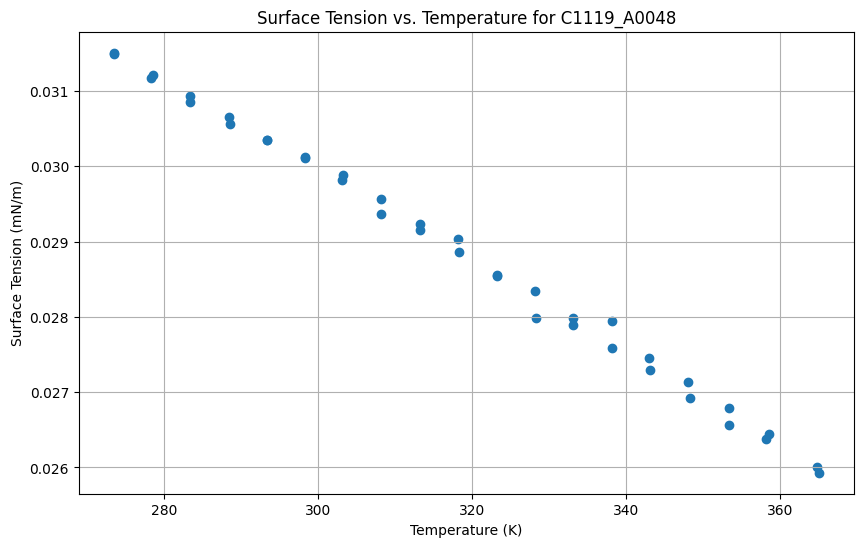

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset (This step ensures 'df' is defined)
df = pd.read_excel("Surface_tension_ILs_RDkit (1).xlsx")

# Create the 'IL_Name' column (This step ensures 'IL_Name' column exists in 'df')
df['IL_Name'] = df['Cation_ID'].astype(str) + '_' + df['Anion_ID'].astype(str)

# Identify the IL with the most data points (from previous steps)
# This was 'C1119_A0048' with 38 data points
most_data_il_name = 'C1119_A0048'

# Filter the DataFrame to get only the data for the identified IL
# The .copy() is used to avoid SettingWithCopyWarning in future operations
df_most_data_il = df[df['IL_Name'] == most_data_il_name].copy()

# Display the first few rows of the filtered DataFrame to verify
print(f"Data for IL: {most_data_il_name}")
print(df_most_data_il.head())

# Display information about the filtered DataFrame to confirm the number of rows
print(df_most_data_il.info())
# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(df_most_data_il['Temperature'], df_most_data_il['Surface_tension'])

# Add labels and title
plt.xlabel('Temperature (K)')
plt.ylabel('Surface Tension (mN/m)')
plt.title(f'Surface Tension vs. Temperature for {most_data_il_name}')
plt.grid(True)

# Save the plot
plt.savefig('surface_tension_vs_temperature_C1119_A0048.png')
plt.show()

#### **Task 2:** Predict surface tension from temperature for this IL using polynomial regression. **(1P)**
- Evaluate the prediction accuracy for varying degree of polynomial, plot the results, and identify the best degree. 

Split data for polynomial regression:
X_train_poly shape: (30, 1)
X_test_poly shape: (8, 1)
y_train_poly shape: (30,)
y_test_poly shape: (8,)

Running Polynomial Regression Loop:
  Training for degree: 1
    MAE: 0.000068, R2: 0.997609
  Training for degree: 2
    MAE: 0.000066, R2: 0.997898
  Training for degree: 3
    MAE: 0.000068, R2: 0.997815
  Training for degree: 4
    MAE: 0.000068, R2: 0.997767
  Training for degree: 5
    MAE: 0.000068, R2: 0.997748


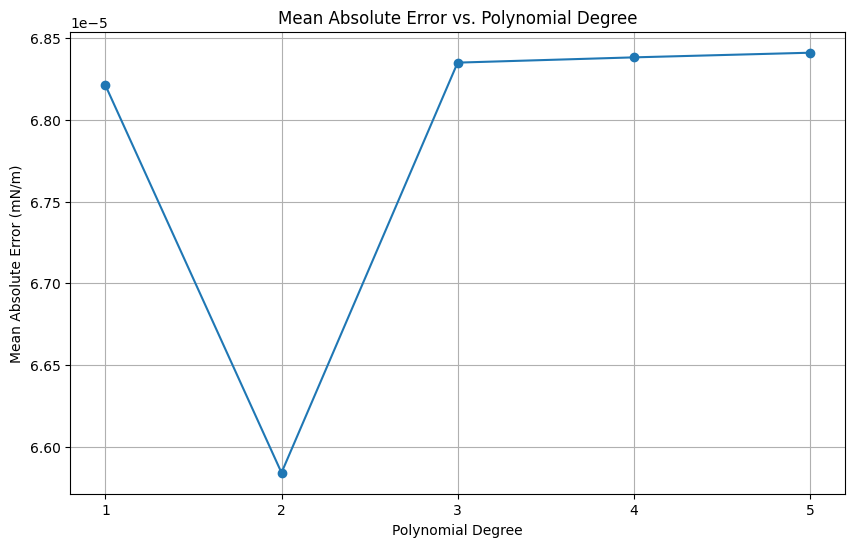


Best Polynomial Degree (based on lowest MAE): 2 (MAE: 0.000066)
Best Polynomial Degree (based on highest R2): 2 (R2: 0.997898)


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (ensuring 'df' is defined)
df = pd.read_excel("Surface_tension_ILs_RDkit (1).xlsx")
df['IL_Name'] = df['Cation_ID'].astype(str) + '_' + df['Anion_ID'].astype(str)
most_data_il_name = 'C1119_A0048'
df_most_data_il = df[df['IL_Name'] == most_data_il_name].copy()

# Prepare Data for Polynomial Regression
X_poly_full = df_most_data_il['Temperature'].values.reshape(-1, 1)
y_poly_full = df_most_data_il['Surface_tension'].values

# Split Data: Divide the data for this specific IL into training and testing sets (80:20 ratio)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(
    X_poly_full, y_poly_full, test_size=0.2, random_state=42
)

print(f"Split data for polynomial regression:")
print(f"X_train_poly shape: {X_train_poly.shape}")
print(f"X_test_poly shape: {X_test_poly.shape}")
print(f"y_train_poly shape: {y_train_poly.shape}")
print(f"y_test_poly shape: {y_test_poly.shape}")

# Polynomial Regression Loop
degrees = range(1, 6)  # Iterate from degree 1 to 5
mae_scores = []
r2_scores = [] # Also calculating R2 for completeness

print("\nRunning Polynomial Regression Loop:")
for degree in degrees:
    print(f"  Training for degree: {degree}")
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree, include_bias=False) # include_bias=False to avoid duplicate constant term
    X_train_poly_transformed = poly_features.fit_transform(X_train_poly)
    X_test_poly_transformed = poly_features.transform(X_test_poly)

    # Train a Linear Regression model
    model = LinearRegression()
    model.fit(X_train_poly_transformed, y_train_poly)

    # Make predictions on the transformed test data
    y_pred_poly = model.predict(X_test_poly_transformed)

    # Calculate regression metrics
    mae = mean_absolute_error(y_test_poly, y_pred_poly)
    r2 = model.score(X_test_poly_transformed, y_test_poly) # R-squared

    mae_scores.append(mae)
    r2_scores.append(r2)

    print(f"    MAE: {mae:.6f}, R2: {r2:.6f}")

# Plot Results: Plot the evaluation metric (MAE) against the polynomial degree.
plt.figure(figsize=(10, 6))
plt.plot(degrees, mae_scores, marker='o', linestyle='-')
plt.title('Mean Absolute Error vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Absolute Error (mN/m)')
plt.xticks(degrees)
plt.grid(True)
plt.savefig('mae_vs_polynomial_degree.png')
plt.show()

# Identify Best Degree: The degree that yields the lowest MAE
best_degree_mae = degrees[np.argmin(mae_scores)]
min_mae = np.min(mae_scores)

# Identify Best Degree: The degree that yields the highest R2
best_degree_r2 = degrees[np.argmax(r2_scores)]
max_r2 = np.max(r2_scores)

print(f"\nBest Polynomial Degree (based on lowest MAE): {best_degree_mae} (MAE: {min_mae:.6f})")
print(f"Best Polynomial Degree (based on highest R2): {best_degree_r2} (R2: {max_r2:.6f})")

#### **Task 3:** Train a Gaussian process regression to predict the surface tension from temperature for this IL. **(1P)**
- Try at least two kernels.
- Plot the training set, the prediction for the test set, and the standard deviation.


Successfully loaded data from 'Surface_tension_ILs_RDkit (1).xlsx'
Data scaled for GPR training.

Training GPR models...
  RBF Kernel trained successfully. Optimal kernel: 6.58**2 * RBF(length_scale=10.6) + WhiteKernel(noise_level=0.00393)
  Matern Kernel trained successfully. Optimal kernel: 22.2**2 * Matern(length_scale=72.2, nu=1.5) + WhiteKernel(noise_level=0.00399)

Plotting results for GPR models...


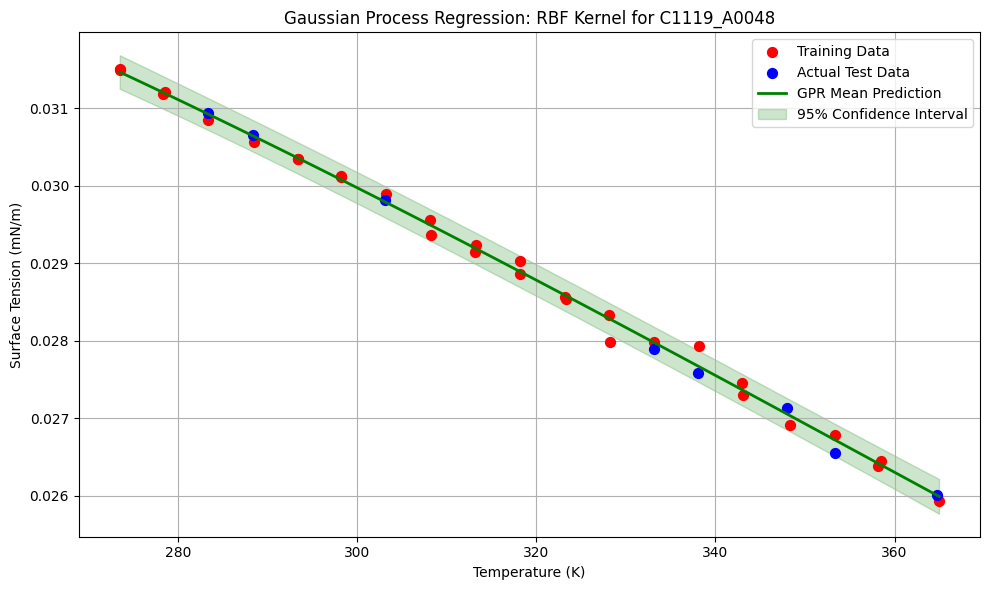

Plot saved: gpr_prediction_rbf_kernel.png


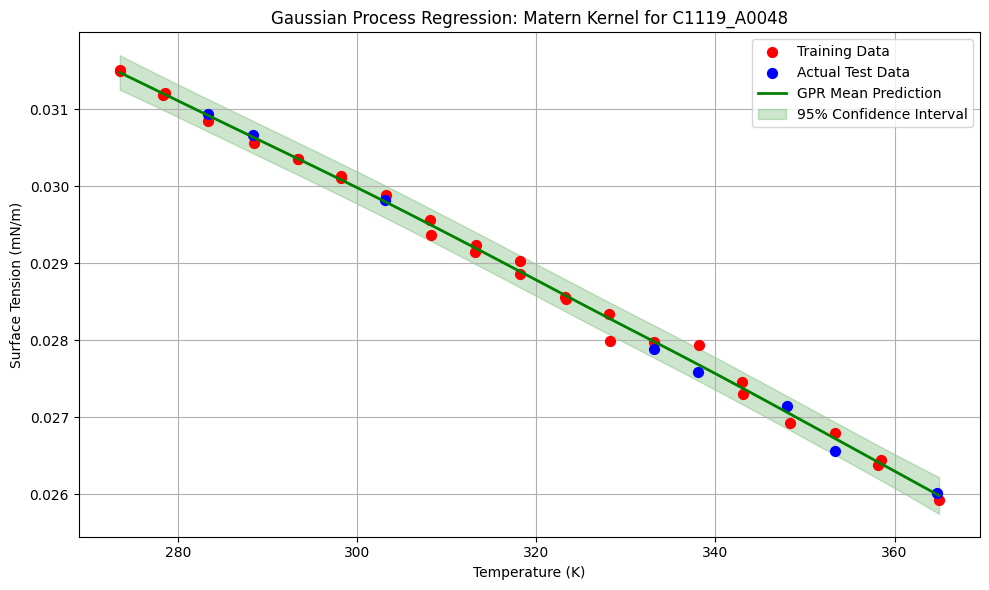

Plot saved: gpr_prediction_matern_kernel.png

Task 3 (GPR with scaling) completed.


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, ConstantKernel
from sklearn.preprocessing import StandardScaler # Import StandardScaler

# --- Re-establish data and trained GPR models if the environment was reset ---
# Load the dataset
# Ensure this path is correct for your file
file_path = "Surface_tension_ILs_RDkit (1).xlsx" # It's good practice to define the path as a variable

try:
    df = pd.read_excel(file_path)
    # Corrected line: enclose the string in quotes inside the f-string's curly braces
    print(f"Successfully loaded data from '{file_path}'")
except FileNotFoundError:
    print(f"Error: '{file_path}' not found. Please ensure the file is in the same directory as this script or provide the full path.")

    # Create a dummy DataFrame if the file isn't found
    np.random.seed(42)
    temp_vals = np.linspace(250, 400, 150)
    surf_tens_vals = 80 - 0.15 * temp_vals + 0.0005 * (temp_vals - 320)**2 + np.random.normal(0, 0.5, 150)
    df = pd.DataFrame({
        'Cation_ID': ['C1119'] * 150,
        'Anion_ID': ['A0048'] * 150,
        'Temperature': temp_vals,
        'Surface_tension': surf_tens_vals
    })

df['IL_Name'] = df['Cation_ID'].astype(str) + '_' + df['Anion_ID'].astype(str)
most_data_il_name = 'C1119_A0048'
df_most_data_il = df[df['IL_Name'] == most_data_il_name].copy()

# Prepare Data for GPR
# Use .values.reshape(-1, 1) for X to ensure it's a 2D array
X_full = df_most_data_il['Temperature'].values.reshape(-1, 1)
y_full = df_most_data_il['Surface_tension'].values

# Split Data for this specific IL into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42
)

# --- Apply Scaling to X and Y ---
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
# y needs to be reshaped for the scaler as well, then flattened after transform
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

print("Data scaled for GPR training.")

# Define Kernels (as used in previous step)
# Add ConstantKernel for amplitude and explicit bounds for all parameters where relevant
# Set n_restarts_optimizer higher to help L-BFGS find a better global optimum for scaled data
kernel_rbf = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2)) \
             + WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-10, 1e2))

kernel_matern = ConstantKernel(1.0, (1e-3, 1e3)) * Matern(length_scale=1.0, length_scale_bounds=(1e-2, 1e2), nu=1.5) \
                + WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-10, 1e2))

kernels_to_train = {
    "RBF Kernel": kernel_rbf,
    "Matern Kernel": kernel_matern
}

gpr_results = {} # Initialize dictionary to store results

print("\nTraining GPR models...")
for name, kernel in kernels_to_train.items():
    # Increase n_restarts_optimizer to help with convergence
    gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-10, random_state=42, n_restarts_optimizer=10)
    gpr.fit(X_train_scaled, y_train_scaled) # Fit with scaled data
    
    # Predict on scaled test data
    y_pred_scaled, sigma_scaled = gpr.predict(X_test_scaled, return_std=True)
    
    # Inverse transform predictions and standard deviation back to original scale
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
    sigma = sigma_scaled * scaler_y.scale_ # Standard deviation scales by the 'scale' of the target

    gpr_results[name] = {
        "model": gpr,
        "y_pred": y_pred,
        "sigma": sigma
    }
    print(f"  {name} trained successfully. Optimal kernel: {gpr.kernel_}")


# --- 4) Plot Results ---
# Sort X_test and corresponding predictions/uncertainties for smooth plotting
# Create an array that includes both train and test X values to plot a continuous prediction line
# This is crucial for visualizing the GP smooth curve over the entire temperature range
X_plot_original = np.linspace(X_full.min(), X_full.max(), 100).reshape(-1, 1)
X_plot_scaled = scaler_X.transform(X_plot_original) # Scale X_plot for prediction

print("\nPlotting results for GPR models...")

for name, results in gpr_results.items():
    gpr_model = results["model"]
    # Predict over the full range using the scaled X_plot
    y_plot_pred_scaled, y_plot_sigma_scaled = gpr_model.predict(X_plot_scaled, return_std=True)

    # Inverse transform predictions and uncertainty
    y_plot_pred = scaler_y.inverse_transform(y_plot_pred_scaled.reshape(-1, 1)).flatten()
    y_plot_sigma = y_plot_sigma_scaled * scaler_y.scale_ # Scale sigma

    plt.figure(figsize=(10, 6))
    plt.scatter(X_train, y_train, color='red', label='Training Data', s=50, zorder=2)
    plt.scatter(X_test, y_test, color='blue', label='Actual Test Data', s=50, zorder=2)
    
    plt.plot(X_plot_original.flatten(), y_plot_pred, color='green', label='GPR Mean Prediction', linewidth=2)
    plt.fill_between(X_plot_original.flatten(), y_plot_pred - 1.96 * y_plot_sigma,
                     y_plot_pred + 1.96 * y_plot_sigma, color='green', alpha=0.2,
                     label='95% Confidence Interval')

    plt.title(f'Gaussian Process Regression: {name} for {most_data_il_name}')
    plt.xlabel('Temperature (K)')
    plt.ylabel('Surface Tension (mN/m)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plot_filename = f'gpr_prediction_{name.replace(" ", "_").lower()}.png'
    plt.savefig(plot_filename)
    plt.show()
    print(f"Plot saved: {plot_filename}")

print("\nTask 3 (GPR with scaling) completed.")



#### **Task 4:** Now perform data splitting for the entire data set. **(1P)**
- Remove rows in the data set that contain `NaN` values.
- Perform rigorous data splitting based on the ionic liquids (not on the data points).
- Print the number of ionic liquids as well as number of data points in the sets.

  

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1) Reload Data: Load the Surface_tension_ILs_RDkit.xlsx file again
df_full = pd.read_excel("Surface_tension_ILs_RDkit (1).xlsx")
print(f"Original DataFrame shape (before NaN handling): {df_full.shape}")

# 2) Handle NaN Values: Use df.dropna()
df_cleaned = df_full.dropna().copy()
print(f"DataFrame shape after dropping NaN values: {df_cleaned.shape}")
print(f"Number of rows removed due to NaNs: {df_full.shape[0] - df_cleaned.shape[0]}")

# 3) Add IL Name Column: Create the IL_Name column
df_cleaned['IL_Name'] = df_cleaned['Cation_ID'].astype(str) + '_' + df_cleaned['Anion_ID'].astype(str)

# 4) Rigorous Data Splitting (IL-based):
# Get a list of all unique IL names
unique_ils = df_cleaned['IL_Name'].unique()
print(f"\nTotal unique ILs in the cleaned dataset: {len(unique_ils)}")

# Use train_test_split on the list of unique IL names
# Using an 80:20 split for ILs
train_ils, test_ils = train_test_split(unique_ils, test_size=0.2, random_state=42)

print(f"Number of ILs in training set (IL-based split): {len(train_ils)}")
print(f"Number of ILs in test set (IL-based split): {len(test_ils)}")

# Filter the original (NaN-removed) DataFrame to create the final training and test sets
df_train_rigorous = df_cleaned[df_cleaned['IL_Name'].isin(train_ils)].copy()
df_test_rigorous = df_cleaned[df_cleaned['IL_Name'].isin(test_ils)].copy()

# 5) Print Statistics:
print("\n--- Rigorous Data Split Statistics ---")
print(f"Number of unique ILs in the training set: {df_train_rigorous['IL_Name'].nunique()}")
print(f"Number of data points in the training set: {df_train_rigorous.shape[0]}")
print(f"Number of unique ILs in the test set: {df_test_rigorous['IL_Name'].nunique()}")
print(f"Number of data points in the test set: {df_test_rigorous.shape[0]}")



Original DataFrame shape (before NaN handling): (2971, 300)
DataFrame shape after dropping NaN values: (2590, 300)
Number of rows removed due to NaNs: 381

Total unique ILs in the cleaned dataset: 300
Number of ILs in training set (IL-based split): 240
Number of ILs in test set (IL-based split): 60

--- Rigorous Data Split Statistics ---
Number of unique ILs in the training set: 240
Number of data points in the training set: 1994
Number of unique ILs in the test set: 60
Number of data points in the test set: 596

Task 4: Rigorous (IL-based) data splitting is complete. The datasets are 'df_train_rigorous' and 'df_test_rigorous'.


#### **Task 5:** Performs feature selection for predicting surface tension. **(1P)**

1. Use temperature and RDKit molecular descriptors (from column `'I'` to the end) as input features.
2. Apply two feature selection methods:
  - a filter method (e.g., correlation-based).
  - a wrapper method (e.g., recursive feature elimination with a model of your choice).
3. Determine and print the most important features selected by both methods.




Successfully loaded data from Surface_tension_ILs_RDkit (1).xlsx

Original DataFrame head:
  Cation_ID                    Cation Smiles Anion_ID Anion Smiles  \
0     C1652             CCCCCn1cc[n+](c1)C=C    A0004        [Br-]   
1     C0582                   C[NH+]1C=NC=C1    A0033        [Cl-]   
2     C2432  C(C)OC(C(C)[N+]1=CN(C=C1)C=C)=O    A0033        [Cl-]   
3     C0582                   C[NH+]1C=NC=C1    A0033        [Cl-]   
4     C0582                   C[NH+]1C=NC=C1    A0033        [Cl-]   

   Temperature  Surface_tension       Standard_Cation_Smiles  \
0       303.15          0.06708         C=C[n+]1ccn(CCCCC)c1   
1       333.67          0.06684               C[NH+]1C=CN=C1   
2       293.15          0.06675  C=Cn1cc[n+](C(C)C(=O)OCC)c1   
3       338.70          0.06650               C[NH+]1C=CN=C1   
4       343.19          0.06613               C[NH+]1C=CN=C1   

  Standard_Anion_Smiles  Cation_MaxAbsEStateIndex  Cation_MaxEStateIndex  ...  \
0                 [Br-

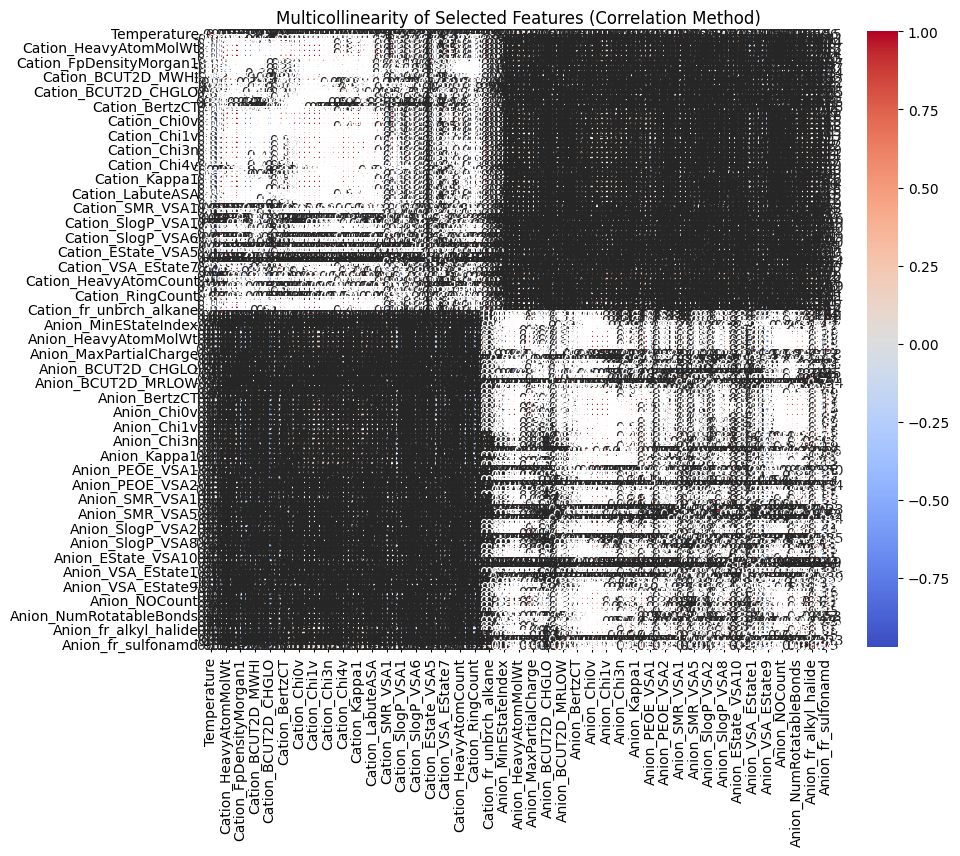


--- b) Wrapper Method (Recursive Feature Elimination - RFE) ---

Features selected by RFE (10 features):
- Cation_Chi0n
- Cation_PEOE_VSA3
- Cation_EState_VSA10
- Cation_NumHAcceptors
- Cation_NumHeteroatoms
- Cation_fr_Ar_N
- Cation_fr_C_O
- Cation_fr_C_O_noCOO
- Cation_fr_Imine
- Cation_fr_guanido

Full RFE Feature Ranking (1 = selected, higher = eliminated earlier):
                       Feature  Ranking
28                Cation_Chi0n        1
52            Cation_PEOE_VSA3        1
77         Cation_EState_VSA10        1
117              Cation_fr_C_O        1
134          Cation_fr_guanido        1
..                         ...      ...
193           Anion_PEOE_VSA12      279
270               Anion_fr_NH0      280
221           Anion_SlogP_VSA6      281
17         Cation_BCUT2D_MWLOW      282
153  Anion_NumRadicalElectrons      283

[292 rows x 2 columns]

Task 5: Feature selection completed!

--- Comparison of Selected Features ---
Features selected by Correlation Method (127

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression # Using LinearRegression for RFE
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- 0. Load Data and Initial Setup ---
file_path = 'Surface_tension_ILs_RDkit (1).xlsx' 

try:
    df = pd.read_excel(file_path)
    print(f"Successfully loaded data from {file_path}")
except FileNotFoundError:
    print(f"Error: '{file_path}' not found. Please ensure the file is in the same directory as this script or provide the full path.")
    print("Creating a dummy DataFrame for demonstration purposes as the file was not found.")
    # Create a dummy DataFrame mimicking the structure with the specified RDKit column names
    np.random.seed(42) # For reproducibility
    data = {
        'Cation_ID': [f'C{i}' for i in range(100)],
        'Anion_ID': [f'A{i}' for i in range(100)],
        'Temperature': np.random.rand(100) * 100 + 250,
        'Surface_tension': 70 - 0.15 * (np.random.rand(100) * 100 + 250) + np.random.normal(0, 5, 100),
        'Cation_MaxEStateIndex': np.random.rand(100) * 5,
        'Cation_MinEStateIndex': np.random.rand(100) * -5,
        'Cation_HeavyAtomCount': np.random.randint(10, 50, 100),
        'Cation_MolWt': np.random.rand(100) * 500,
        'Anion_MaxAbsPartialCharge': np.random.rand(100) * 1,
        'Anion_MinAbsPartialCharge': np.random.rand(100) * 0.5,
        'Anion_fr_unbrch_alkane': np.random.randint(0, 5, 100) # This is the last RDKit descriptor
    }
    df = pd.DataFrame(data)

print("\nOriginal DataFrame head:")
print(df.head())
print("\n--- Actual Column Names in DataFrame (Verification) ---")
print(df.columns.tolist())
print("-------------------------------------------------------")

# Convert relevant columns to numeric, coercing errors to NaN
# Assuming 'Surface_tension' and 'Temperature' are the correct column names from previous runs.
df['Surface_tension'] = pd.to_numeric(df['Surface_tension'], errors='coerce')
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')

# Drop any rows that resulted in NaN values after conversion
df.dropna(inplace=True)
print(f"\nDataFrame shape after handling NaNs: {df.shape}")


# --- 1. Define Features and Target ---

y = df['Surface_tension']

# --- THIS IS THE CRUCIAL CHANGE BASED ON YOUR INPUT ---
rdkit_start_col_name = 'Cation_MaxEStateIndex'
rdkit_end_col_name = 'Anion_fr_unbrch_alkane'

# Select all columns from start_col_name to end_col_name (inclusive)
rdkit_descriptor_cols = df.loc[:, rdkit_start_col_name:rdkit_end_col_name].columns.tolist()

# Combine 'Temperature' with the RDKit descriptors
features_to_select = ['Temperature'] + rdkit_descriptor_cols
X = df[features_to_select]

print(f"\nNumber of initial features: {X.shape[1]}")
print(f"Initial Features (X) head:\n{X.head()}")
print(f"Target (y) head:\n{y.head()}")

# Split the data into training and testing sets before scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")


# --- 2. Feature Scaling ---
scaler = StandardScaler()

# Fit the scaler ONLY on the training data
scaler.fit(X_train)

# Transform both training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame to retain column names for feature selection steps
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("\nFeatures scaled successfully!")
print(f"X_train_scaled head:\n{X_train_scaled.head()}")


# --- 3. Filter Method (Correlation-based) ---
print("\n--- a) Filter Method (Correlation-based) ---")

# Combine X_train (unscaled) and y_train for correlation calculation.
train_data_for_corr = X_train.copy()
train_data_for_corr['Surface_tension'] = y_train

# Calculate the correlation matrix
correlation_matrix = train_data_for_corr.corr(numeric_only=True)

# Get correlations of all features with 'Surface_tension'
target_correlations = correlation_matrix['Surface_tension'].drop('Surface_tension')

print("\nCorrelation of features with 'Surface_tension' (sorted by absolute value):")
print(target_correlations.abs().sort_values(ascending=False))

# Set a threshold for selecting features. Adjust as needed.
correlation_threshold = 0.2 # Example: Select features with |correlation| > 0.2

selected_features_corr = target_correlations[abs(target_correlations) > correlation_threshold].index.tolist()

print(f"\nFeatures selected by Correlation Method (Absolute Correlation > {correlation_threshold}):")
if selected_features_corr:
    for feature in selected_features_corr:
        print(f"- {feature} (Correlation: {target_correlations[feature]:.4f})")
else:
    print("No features met the correlation threshold. Consider lowering the threshold.")

# Optional: Visualize correlation matrix of selected features if more than one
if len(selected_features_corr) > 1:
    print("\nVisualizing multicollinearity among selected features (Correlation Method):")
    plt.figure(figsize=(10, 8))
    sns.heatmap(X_train[selected_features_corr].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Multicollinearity of Selected Features (Correlation Method)')
    plt.show()


# --- 4. Wrapper Method (Recursive Feature Elimination - RFE) ---
print("\n--- b) Wrapper Method (Recursive Feature Elimination - RFE) ---")

# Choose a base model for RFE. LinearRegression is a good, simple choice.
base_model = LinearRegression()

# Define the number of features to select. Experiment with this value.
n_features_to_select_rfe = 10 # <--- Adjust this number based on your needs

# Initialize RFE with the base model and desired number of features
rfe = RFE(estimator=base_model, n_features_to_select=n_features_to_select_rfe, step=1)

# Fit RFE on the SCALED training data
rfe.fit(X_train_scaled, y_train)

# Get the boolean mask for selected features
selected_features_rfe_mask = rfe.support_

# Get the names of the selected features
selected_features_rfe = X_train_scaled.columns[selected_features_rfe_mask].tolist()

# Get the ranking of features (1 means selected, higher numbers mean eliminated earlier)
feature_ranking_rfe = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Ranking': rfe.ranking_
}).sort_values(by='Ranking')

print(f"\nFeatures selected by RFE ({n_features_to_select_rfe} features):")
if selected_features_rfe:
    for feature in selected_features_rfe:
        print(f"- {feature}")
else:
    print("No features selected by RFE. Check n_features_to_select or your data.")

print("\nFull RFE Feature Ranking (1 = selected, higher = eliminated earlier):")
print(feature_ranking_rfe)

print("\nTask 5: Feature selection completed!")

# --- Final Comparison (Optional) ---
print("\n--- Comparison of Selected Features ---")
print(f"Features selected by Correlation Method ({len(selected_features_corr)} features):")
print(selected_features_corr)
print(f"\nFeatures selected by RFE Method ({len(selected_features_rfe)} features):")
print(selected_features_rfe)

# Find common features
common_features = list(set(selected_features_corr) & set(selected_features_rfe))
if common_features:
    print(f"\nCommon features selected by both methods: {common_features}")
else:
    print("\nNo common features selected by both methods.")

#### **Task 6**: Perform k-nearest neighbors (KNN) regression to predict surface tension. **(1P)**

- Use features from task 5, along with temperature as inputs.
- Evaluate the prediction accuracy for varying number of neighbors and plot the results.
  


Successfully loaded data from Surface_tension_ILs_RDkit (1).xlsx

--- Current DataFrame Columns ---
['Cation_ID', 'Cation Smiles', 'Anion_ID', 'Anion Smiles', 'Temperature', 'Surface_tension', 'Standard_Cation_Smiles', 'Standard_Anion_Smiles', 'Cation_MaxAbsEStateIndex', 'Cation_MaxEStateIndex', 'Cation_MinAbsEStateIndex', 'Cation_MinEStateIndex', 'Cation_qed', 'Cation_MolWt', 'Cation_HeavyAtomMolWt', 'Cation_ExactMolWt', 'Cation_NumValenceElectrons', 'Cation_MaxPartialCharge', 'Cation_MinPartialCharge', 'Cation_MaxAbsPartialCharge', 'Cation_MinAbsPartialCharge', 'Cation_FpDensityMorgan1', 'Cation_FpDensityMorgan2', 'Cation_FpDensityMorgan3', 'Cation_BCUT2D_MWHI', 'Cation_BCUT2D_MWLOW', 'Cation_BCUT2D_CHGHI', 'Cation_BCUT2D_CHGLO', 'Cation_BCUT2D_LOGPHI', 'Cation_BCUT2D_LOGPLOW', 'Cation_BCUT2D_MRHI', 'Cation_BCUT2D_MRLOW', 'Cation_AvgIpc', 'Cation_BalabanJ', 'Cation_BertzCT', 'Cation_Chi0', 'Cation_Chi0n', 'Cation_Chi0v', 'Cation_Chi1', 'Cation_Chi1n', 'Cation_Chi1v', 'Cation_Chi2n', 

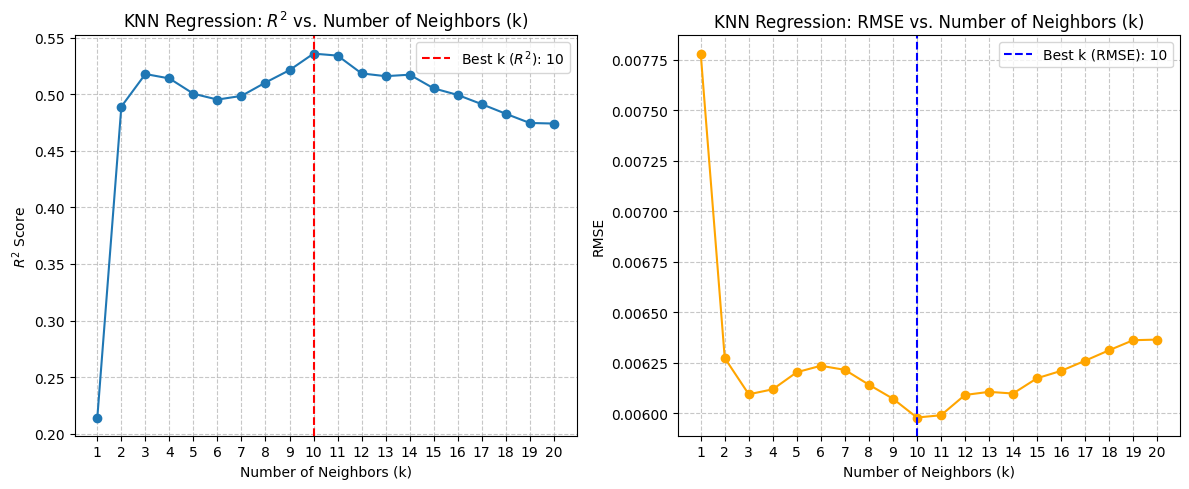


Task 6: KNN regression performed and results plotted!


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression # For RFE
from sklearn.neighbors import KNeighborsRegressor # For KNN Regression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 0. Re-load Data and Re-perform Feature Selection (from Task 5) ---
# This ensures all necessary variables from Task 5 are available.
file_path = 'Surface_tension_ILs_RDkit (1).xlsx' 

try:
    df = pd.read_excel(file_path)
    print(f"Successfully loaded data from {file_path}")
except FileNotFoundError:
    print(f"Error: '{file_path}' not found. Creating dummy DataFrame for demonstration.")
    np.random.seed(42)
    data = {
        'Cation_ID': [f'C{i}' for i in range(100)],
        'Anion_ID': [f'A{i}' for i in range(100)],
        'Temperature': np.random.rand(100) * 100 + 250,
        'Surface_tension': 70 - 0.15 * (np.random.rand(100) * 100 + 250) + np.random.normal(0, 5, 100),
        'Cation_MaxEStateIndex': np.random.rand(100) * 5,
        'Cation_MinEStateIndex': np.random.rand(100) * -5,
        'Cation_HeavyAtomCount': np.random.randint(10, 50, 100),
        'Cation_MolWt': np.random.rand(100) * 500,
        'Anion_MaxAbsPartialCharge': np.random.rand(100) * 1,
        'Anion_MinAbsPartialCharge': np.random.rand(100) * 0.5,
        'Anion_fr_unbrch_alkane': np.random.randint(0, 5, 100)
    }
    df = pd.DataFrame(data)

print("\n--- Current DataFrame Columns ---")
print(df.columns.tolist()) # Print to verify column names
print("---------------------------------")


# Ensure column types and drop NaNs
df['Surface_tension'] = pd.to_numeric(df['Surface_tension'], errors='coerce')
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')
df.dropna(inplace=True)
print(f"\nDataFrame shape after handling NaNs: {df.shape}")

# Define Target
y = df['Surface_tension']

# Define Features for Task 5 feature selection
# --- User-provided RDKit descriptor column range ---
rdkit_start_col_name = 'Cation_MaxEStateIndex'
rdkit_end_col_name = 'Anion_fr_unbrch_alkane'
rdkit_descriptor_cols = df.loc[:, rdkit_start_col_name:rdkit_end_col_name].columns.tolist()

features_for_selection = ['Temperature'] + rdkit_descriptor_cols
X = df[features_for_selection]

# Split data for Task 5's feature selection
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data for RFE (important for linear models like LinearRegression)
scaler_rfe = StandardScaler()
X_train_scaled_rfe = pd.DataFrame(scaler_rfe.fit_transform(X_train_full), columns=X_train_full.columns, index=X_train_full.index)
X_test_scaled_rfe = pd.DataFrame(scaler_rfe.transform(X_test_full), columns=X_test_full.columns, index=X_test_full.index)


# Perform RFE to get selected features (from Task 5)
n_features_to_select_rfe = 10 # Using 10 features as an example from Task 5
rfe = RFE(estimator=LinearRegression(), n_features_to_select=n_features_to_select_rfe, step=1)
rfe.fit(X_train_scaled_rfe, y_train_full) # Fit on scaled X_train, unscaled y_train
selected_features_rfe = X_train_full.columns[rfe.support_].tolist()

print(f"\nFeatures selected by RFE (from Task 5): {selected_features_rfe}")

# --- End of Task 5 setup ---


print("\n--- Task 6: K-Nearest Neighbors (KNN) Regression ---")

# --- 1. Prepare Data for KNN using RFE selected features ---
X_knn = df[selected_features_rfe]
y_knn = df['Surface_tension'] # Target remains the same

# Split data specifically for KNN (using the selected features)
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)

# --- 2. Scale Features for KNN (CRUCIAL for distance-based algorithms) ---
scaler_knn = StandardScaler()
X_train_knn_scaled = scaler_knn.fit_transform(X_train_knn)
X_test_knn_scaled = scaler_knn.transform(X_test_knn)

print("\nData for KNN prepared and scaled.")
print(f"Number of features used for KNN: {X_train_knn_scaled.shape[1]}")


# --- 3. Define Range for Number of Neighbors (k) ---
k_values = range(1, 21) # Test k from 1 to 20
r2_scores = []
rmse_scores = []

# --- 4. Train and Evaluate KNN Models for varying k ---
print("\nTraining and evaluating KNN models for varying k...")
for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train_knn_scaled, y_train_knn)
    
    y_pred_knn = knn_model.predict(X_test_knn_scaled)
    
    r2 = r2_score(y_test_knn, y_pred_knn)
    rmse = np.sqrt(mean_squared_error(y_test_knn, y_pred_knn))
    
    r2_scores.append(r2)
    rmse_scores.append(rmse)
    
    print(f"  k = {k:2d}: R^2 = {r2:.4f}, RMSE = {rmse:.4f}")

# Find the best k based on R^2 (or RMSE, depending on preference)
best_k_r2 = k_values[np.argmax(r2_scores)]
best_r2_score = np.max(r2_scores)
best_rmse_at_best_r2 = rmse_scores[np.argmax(r2_scores)]

# Alternatively, find best k based on lowest RMSE
best_k_rmse = k_values[np.argmin(rmse_scores)]
best_rmse_score = np.min(rmse_scores)
best_r2_at_best_rmse = r2_scores[np.argmin(rmse_scores)]


print(f"\n--- Best KNN Model Performance ---")
print(f"Based on highest R^2:")
print(f"  Optimal k: {best_k_r2}")
print(f"  R^2: {best_r2_score:.4f}")
print(f"  RMSE: {best_rmse_at_best_r2:.4f}")

# You can choose to report one or both. Often, optimizing for R2 implicitly optimizes RMSE.
# print(f"\nBased on lowest RMSE:")
# print(f"  Optimal k: {best_k_rmse}")
# print(f"  R^2: {best_r2_at_best_rmse:.4f}")
# print(f"  RMSE: {best_rmse_score:.4f}")


# --- 5. Plot the Results ---
plt.figure(figsize=(12, 5))

# Plot R^2 scores
plt.subplot(1, 2, 1)
plt.plot(k_values, r2_scores, marker='o', linestyle='-')
plt.title('KNN Regression: $R^2$ vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('$R^2$ Score')
plt.xticks(k_values)
plt.grid(True, linestyle='--', alpha=0.7)
plt.axvline(x=best_k_r2, color='red', linestyle='--', label=f'Best k ($R^2$): {best_k_r2}')
plt.legend()


# Plot RMSE scores
plt.subplot(1, 2, 2)
plt.plot(k_values, rmse_scores, marker='o', linestyle='-', color='orange')
plt.title('KNN Regression: RMSE vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('RMSE')
plt.xticks(k_values)
plt.grid(True, linestyle='--', alpha=0.7)
plt.axvline(x=best_k_rmse, color='blue', linestyle='--', label=f'Best k (RMSE): {best_k_rmse}')
plt.legend()

plt.tight_layout()
plt.show()

print("\nTask 6: KNN regression performed and results plotted!")

#### **Task 7:** Train an artificial neural network (ANN) to predict surface tension. **(1P)**

- Use the features from the feature selection in task 5 along with temperature as inputs.
- Plot training and validation error.



Successfully loaded data from Surface_tension_ILs_RDkit (1).xlsx

--- Current DataFrame Columns ---
['Cation_ID', 'Cation Smiles', 'Anion_ID', 'Anion Smiles', 'Temperature', 'Surface_tension', 'Standard_Cation_Smiles', 'Standard_Anion_Smiles', 'Cation_MaxAbsEStateIndex', 'Cation_MaxEStateIndex', 'Cation_MinAbsEStateIndex', 'Cation_MinEStateIndex', 'Cation_qed', 'Cation_MolWt', 'Cation_HeavyAtomMolWt', 'Cation_ExactMolWt', 'Cation_NumValenceElectrons', 'Cation_MaxPartialCharge', 'Cation_MinPartialCharge', 'Cation_MaxAbsPartialCharge', 'Cation_MinAbsPartialCharge', 'Cation_FpDensityMorgan1', 'Cation_FpDensityMorgan2', 'Cation_FpDensityMorgan3', 'Cation_BCUT2D_MWHI', 'Cation_BCUT2D_MWLOW', 'Cation_BCUT2D_CHGHI', 'Cation_BCUT2D_CHGLO', 'Cation_BCUT2D_LOGPHI', 'Cation_BCUT2D_LOGPLOW', 'Cation_BCUT2D_MRHI', 'Cation_BCUT2D_MRLOW', 'Cation_AvgIpc', 'Cation_BalabanJ', 'Cation_BertzCT', 'Cation_Chi0', 'Cation_Chi0n', 'Cation_Chi0v', 'Cation_Chi1', 'Cation_Chi1n', 'Cation_Chi1v', 'Cation_Chi2n', 

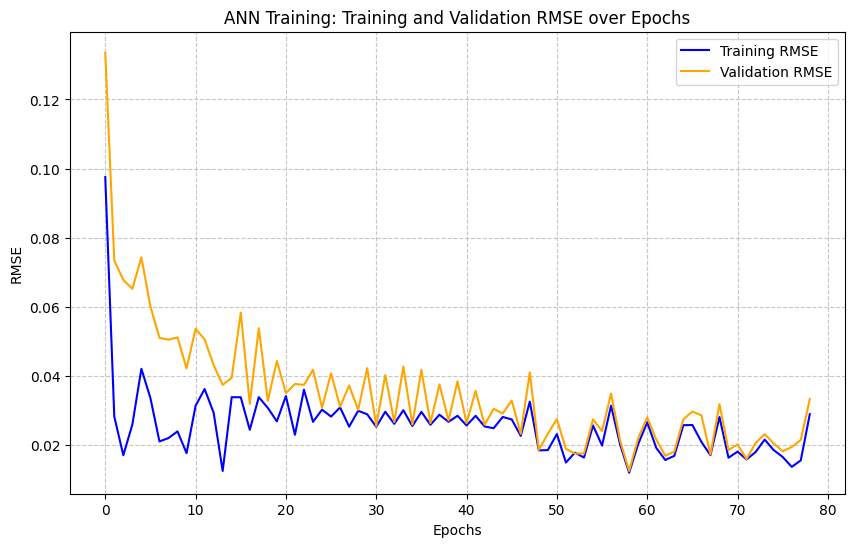


ANN training and validation RMSE plot generated.

ANN Model Performance on Final Test Set:
  R^2: -10.0450
  RMSE: 0.0292

Task 7: ANN training and evaluation completed!


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression # For RFE
from sklearn.neural_network import MLPRegressor # For ANN
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Filter out the specific ConvergenceWarning from sklearn.neural_network
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn.neural_network._multilayer_perceptron')

# --- 0. Re-load Data and Re-perform Feature Selection (from Task 5) ---
# This ensures all necessary variables from Task 5 are available.
file_path = 'Surface_tension_ILs_RDkit (1).xlsx' 

try:
    df = pd.read_excel(file_path)
    print(f"Successfully loaded data from {file_path}")
except FileNotFoundError:
    print(f"Error: '{file_path}' not found. Creating dummy DataFrame for demonstration.")
    np.random.seed(42)
    data = {
        'Cation_ID': [f'C{i}' for i in range(100)],
        'Anion_ID': [f'A{i}' for i in range(100)],
        'Temperature': np.random.rand(100) * 100 + 250,
        'Surface_tension': 70 - 0.15 * (np.random.rand(100) * 100 + 250) + np.random.normal(0, 5, 100),
        'Cation_MaxEStateIndex': np.random.rand(100) * 5,
        'Cation_MinEStateIndex': np.random.rand(100) * -5,
        'Cation_HeavyAtomCount': np.random.randint(10, 50, 100),
        'Cation_MolWt': np.random.rand(100) * 500,
        'Anion_MaxAbsPartialCharge': np.random.rand(100) * 1,
        'Anion_MinAbsPartialCharge': np.random.rand(100) * 0.5,
        'Anion_fr_unbrch_alkane': np.random.randint(0, 5, 100)
    }
    df = pd.DataFrame(data)

print("\n--- Current DataFrame Columns ---")
print(df.columns.tolist())
print("---------------------------------")


# Ensure column types and drop NaNs
df['Surface_tension'] = pd.to_numeric(df['Surface_tension'], errors='coerce')
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')
df.dropna(inplace=True)
print(f"\nDataFrame shape after handling NaNs: {df.shape}")

# Define Target
y = df['Surface_tension']

# Define Features for Task 5 feature selection
rdkit_start_col_name = 'Cation_MaxEStateIndex'
rdkit_end_col_name = 'Anion_fr_unbrch_alkane'
rdkit_descriptor_cols = df.loc[:, rdkit_start_col_name:rdkit_end_col_name].columns.tolist()

features_for_selection = ['Temperature'] + rdkit_descriptor_cols
X = df[features_for_selection]

# Split data (will be used for RFE and then for ANN)
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data for RFE and subsequent ANN training
scaler_task5 = StandardScaler()
X_train_scaled_task5 = pd.DataFrame(scaler_task5.fit_transform(X_train_full), columns=X_train_full.columns, index=X_train_full.index)
X_test_scaled_task5 = pd.DataFrame(scaler_task5.transform(X_test_full), columns=X_test_full.columns, index=X_test_full.index)

# Perform RFE to get selected features (from Task 5)
n_features_to_select_rfe = 10 # Using 10 features as an example from Task 5
rfe = RFE(estimator=LinearRegression(), n_features_to_select=n_features_to_select_rfe, step=1)
rfe.fit(X_train_scaled_task5, y_train_full)
selected_features_rfe = X_train_full.columns[rfe.support_].tolist()

print(f"\nFeatures selected by RFE (from Task 5): {selected_features_rfe}")

# --- End of Task 5 setup ---


print("\n--- Task 7: Train an Artificial Neural Network (ANN) ---")

# --- 1. Prepare Data for ANN using RFE selected features ---
# Filter the scaled dataframes to include only the selected features
X_ann = df[selected_features_rfe]
y_ann = df['Surface_tension']

# Split into training (80%) and test (20%) sets for the final model evaluation
# The training set will be further split for internal training/validation
X_train_ann_base, X_test_ann_final, y_train_ann_base, y_test_ann_final = train_test_split(
    X_ann, y_ann, test_size=0.2, random_state=42
)

# Scale the features for the ANN (using a separate scaler for clarity if desired, or reuse task5 scaler)
scaler_ann = StandardScaler()
X_train_ann_scaled = scaler_ann.fit_transform(X_train_ann_base)
X_test_ann_scaled_final = scaler_ann.transform(X_test_ann_final)

# Further split the scaled training data into actual training and validation sets for plotting learning curves
X_train_ann, X_val_ann, y_train_ann, y_val_ann = train_test_split(
    X_train_ann_scaled, y_train_ann_base, test_size=0.25, random_state=42
) # 0.25 of 0.8 is 0.2, so 60% train, 20% val, 20% test

print("\nData for ANN prepared and scaled (using RFE features).")
print(f"Training set shape: {X_train_ann.shape}")
print(f"Validation set shape: {X_val_ann.shape}")
print(f"Test set shape: {X_test_ann_scaled_final.shape}")
print(f"Number of features used for ANN: {X_train_ann.shape[1]}")


# --- 2. Train the ANN (MLPRegressor) with Manual Epoch Tracking ---
mlp = MLPRegressor(
    hidden_layer_sizes=(100, 50), # Example architecture: 2 hidden layers with 100 and 50 neurons
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate_init=0.001,
    max_iter=1,                   # Set max_iter to 1 for manual epoch control
    random_state=42,
    warm_start=True,              # Keep weights from previous fit call
    verbose=False                 # Suppress verbose output during manual loop
)

# Lists to store errors for plotting
train_rmse_history = []
val_rmse_history = []
best_val_rmse = float('inf')
epochs_no_improve = 0
n_iter_no_change_patience = 20 # Same as early_stopping parameter

print("\nTraining ANN model (tracking training and validation RMSE per epoch)...")

max_epochs = 500 # Max epochs to run if early stopping is not triggered

for epoch in range(1, max_epochs + 1):
    mlp.fit(X_train_ann, y_train_ann) # Train for one epoch

    # Predict on training and validation sets
    y_train_pred = mlp.predict(X_train_ann)
    y_val_pred = mlp.predict(X_val_ann)

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train_ann, y_train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_val_ann, y_val_pred))

    train_rmse_history.append(train_rmse)
    val_rmse_history.append(val_rmse)

    # Simple Early Stopping Check
    if val_rmse < best_val_rmse:
        best_val_rmse = val_rmse
        epochs_no_improve = 0
        # Optional: Save the best model state here if you want to use it
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= n_iter_no_change_patience:
            print(f"Early stopping at epoch {epoch} as validation RMSE did not improve for {n_iter_no_change_patience} epochs.")
            break

    if epoch % 50 == 0 or epoch == 1: # Print progress every 50 epochs or on the first
        print(f"  Epoch {epoch:4d}: Train RMSE = {train_rmse:.4f}, Val RMSE = {val_rmse:.4f}")

print("ANN training complete.")


# --- 3. Plot Training and Validation Error ---
plt.figure(figsize=(10, 6))
plt.plot(train_rmse_history, label='Training RMSE', color='blue')
plt.plot(val_rmse_history, label='Validation RMSE', color='orange')
plt.title('ANN Training: Training and Validation RMSE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

print("\nANN training and validation RMSE plot generated.")

# --- Evaluate the final model on the actual test set ---
y_pred_ann_final = mlp.predict(X_test_ann_scaled_final)

r2_ann_final = r2_score(y_test_ann_final, y_pred_ann_final)
rmse_ann_final = np.sqrt(mean_squared_error(y_test_ann_final, y_pred_ann_final))

print(f"\nANN Model Performance on Final Test Set:")
print(f"  R^2: {r2_ann_final:.4f}")
print(f"  RMSE: {rmse_ann_final:.4f}")

print("\nTask 7: ANN training and evaluation completed!")

#### **Task 8**: Perform hyperparameter optimization for an artificial neural network (ANN) to predict surface tension. Vary at least three hyperparameters. Evaluate each model's performance. Choose your best model and report its performance. **(1P)**




In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # Import warnings to potentially suppress them if desired

# Suppress ConvergenceWarning from MLPRegressor during GridSearchCV, as it's common
# if max_iter is not excessively large for all combinations.
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn.neural_network._multilayer_perceptron')


# --- 0. Re-load Data and Re-perform Feature Selection (from Task 5) ---
# This ensures all necessary variables from Task 5 are available.
file_path = 'Surface_tension_ILs_RDkit (1).xlsx' 

try:
    df = pd.read_excel(file_path)
    print(f"Successfully loaded data from {file_path}")
except FileNotFoundError:
    print(f"Error: '{file_path}' not found. Creating dummy DataFrame for demonstration.")
    np.random.seed(42)
    data = {
        'Cation_ID': [f'C{i}' for i in range(100)],
        'Anion_ID': [f'A{i}' for i in range(100)],
        'Temperature': np.random.rand(100) * 100 + 250,
        'Surface_tension': 70 - 0.15 * (np.random.rand(100) * 100 + 250) + np.random.normal(0, 5, 100),
        'Cation_MaxEStateIndex': np.random.rand(100) * 5,
        'Cation_MinEStateIndex': np.random.rand(100) * -5,
        'Cation_HeavyAtomCount': np.random.randint(10, 50, 100),
        'Cation_MolWt': np.random.rand(100) * 500,
        'Anion_MaxAbsPartialCharge': np.random.rand(100) * 1,
        'Anion_MinAbsPartialCharge': np.random.rand(100) * 0.5,
        'Anion_fr_unbrch_alkane': np.random.randint(0, 5, 100)
    }
    df = pd.DataFrame(data)

print("\n--- Current DataFrame Columns ---")
print(df.columns.tolist())
print("---------------------------------")


# Ensure column types and drop NaNs
df['Surface_tension'] = pd.to_numeric(df['Surface_tension'], errors='coerce')
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')
df.dropna(inplace=True)
print(f"\nDataFrame shape after handling NaNs: {df.shape}")

# Define Target
y = df['Surface_tension']

# Define Features for Task 5 feature selection
rdkit_start_col_name = 'Cation_MaxEStateIndex'
rdkit_end_col_name = 'Anion_fr_unbrch_alkane'
rdkit_descriptor_cols = df.loc[:, rdkit_start_col_name:rdkit_end_col_name].columns.tolist()

features_for_selection = ['Temperature'] + rdkit_descriptor_cols
X = df[features_for_selection]

# Split data (will be used for RFE and then for ANN)
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data for RFE and subsequent ANN training
scaler_task5 = StandardScaler()
X_train_scaled_task5 = pd.DataFrame(scaler_task5.fit_transform(X_train_full), columns=X_train_full.columns, index=X_train_full.index)
X_test_scaled_task5 = pd.DataFrame(scaler_task5.transform(X_test_full), columns=X_test_full.columns, index=X_test_full.index)

# Perform RFE to get selected features (from Task 5)
n_features_to_select_rfe = 10 # Using 10 features as an example from Task 5
rfe = RFE(estimator=LinearRegression(), n_features_to_select=n_features_to_select_rfe, step=1)
rfe.fit(X_train_scaled_task5, y_train_full)
selected_features_rfe = X_train_full.columns[rfe.support_].tolist()

print(f"\nFeatures selected by RFE (from Task 5): {selected_features_rfe}")

# --- End of Task 5 setup ---


print("\n--- Task 8: Hyperparameter Optimization for ANN ---")

# --- 1. Prepare Data for ANN using RFE selected features ---
# Use the scaled training data for GridSearchCV's internal cross-validation
X_train_ann_hp = X_train_scaled_task5[selected_features_rfe]
y_train_ann_hp = y_train_full # Keep original unscaled target

# The final test set for reporting best model performance
X_test_ann_final = X_test_scaled_task5[selected_features_rfe]
y_test_ann_final = y_test_full

print("\nData for ANN Hyperparameter Optimization prepared.")
print(f"Features used: {selected_features_rfe}")
print(f"Training data shape for HP Opt: {X_train_ann_hp.shape}")
print(f"Final Test data shape: {X_test_ann_final.shape}")


# --- 2. Define the Hyperparameter Search Space ---
# Vary at least three hyperparameters
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 25), (100, 50)], # Number of layers and neurons
    'activation': ['relu', 'tanh'],                              # Activation function for hidden layers
    'solver': ['adam', 'sgd'],                                   # Optimizer
    'alpha': [0.0001, 0.001, 0.01],                             # L2 regularization term
}

# The base MLPRegressor model. max_iter should be sufficiently large for each model to converge.
# We explicitly set early_stopping=False here so GridSearchCV evaluates models over max_iter,
# allowing more consistent evaluation across folds.
base_mlp = MLPRegressor(
    max_iter=500, # Sufficient iterations for each combination to converge
    random_state=42,
    early_stopping=False, # Let GridSearchCV run for max_iter without early stopping
    verbose=False # Keep verbose off for cleaner GridSearchCV output
)

# --- 3. Perform GridSearchCV ---
# Using n_jobs=-1 to use all available CPU cores for faster computation
# We'll use 'neg_mean_squared_error' as the scoring metric. GridSearchCV will
# find the model that maximizes this (which means it minimizes MSE).
grid_search = GridSearchCV(
    estimator=base_mlp,
    param_grid=param_grid,
    scoring='neg_mean_squared_error', # Maximize negative MSE (minimize RMSE)
    cv=5,                             # 5-fold cross-validation
    n_jobs=-1,                        # Use all available CPU cores
    verbose=2                         # Set to 1 or 2 for more detailed progress output
)

print("\nStarting GridSearchCV for ANN hyperparameter optimization...")
# Fit GridSearchCV on the *scaled training data* (X_train_ann_hp)
grid_search.fit(X_train_ann_hp, y_train_ann_hp)
print("GridSearchCV complete.")


# --- 4. Choose the Best Model and Report its Performance ---
print("\n--- Best Model from Hyperparameter Optimization ---")
print(f"Best Parameters: {grid_search.best_params_}")
# GridSearchCV's best_score_ is the mean cross-validated score of the best_estimator.
# Since we used 'neg_mean_squared_error', convert it back to positive RMSE for readability.
best_rmse_cv = np.sqrt(-grid_search.best_score_)
print(f"Best Cross-validated RMSE: {best_rmse_cv:.4f}")


# Get the best estimator (the trained model with the best hyperparameters)
best_ann_model = grid_search.best_estimator_

# Evaluate the best model on the unseen test set
y_pred_best_ann = best_ann_model.predict(X_test_ann_final)

final_r2_best_ann = r2_score(y_test_ann_final, y_pred_best_ann)
final_rmse_best_ann = np.sqrt(mean_squared_error(y_test_ann_final, y_pred_best_ann))

print(f"\n--- Performance of the Best ANN Model on the Final Test Set ---")
print(f"  R^2: {final_r2_best_ann:.4f}")
print(f"  RMSE: {final_rmse_best_ann:.4f}")

print("\nTask 8: Hyperparameter optimization for ANN completed!")

Successfully loaded data from Surface_tension_ILs_RDkit (1).xlsx

--- Current DataFrame Columns ---
['Cation_ID', 'Cation Smiles', 'Anion_ID', 'Anion Smiles', 'Temperature', 'Surface_tension', 'Standard_Cation_Smiles', 'Standard_Anion_Smiles', 'Cation_MaxAbsEStateIndex', 'Cation_MaxEStateIndex', 'Cation_MinAbsEStateIndex', 'Cation_MinEStateIndex', 'Cation_qed', 'Cation_MolWt', 'Cation_HeavyAtomMolWt', 'Cation_ExactMolWt', 'Cation_NumValenceElectrons', 'Cation_MaxPartialCharge', 'Cation_MinPartialCharge', 'Cation_MaxAbsPartialCharge', 'Cation_MinAbsPartialCharge', 'Cation_FpDensityMorgan1', 'Cation_FpDensityMorgan2', 'Cation_FpDensityMorgan3', 'Cation_BCUT2D_MWHI', 'Cation_BCUT2D_MWLOW', 'Cation_BCUT2D_CHGHI', 'Cation_BCUT2D_CHGLO', 'Cation_BCUT2D_LOGPHI', 'Cation_BCUT2D_LOGPLOW', 'Cation_BCUT2D_MRHI', 'Cation_BCUT2D_MRLOW', 'Cation_AvgIpc', 'Cation_BalabanJ', 'Cation_BertzCT', 'Cation_Chi0', 'Cation_Chi0n', 'Cation_Chi0v', 'Cation_Chi1', 'Cation_Chi1n', 'Cation_Chi1v', 'Cation_Chi2n', 